In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense,RepeatVector, LSTM, Dropout
from tensorflow.keras.layers import Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
df = pd.read_csv("testset.csv")


In [ ]:
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [ ]:
df[' _conds'].value_counts()


Haze                             47602
Smoke                            20760
Mist                              9375
Clear                             3129
Widespread Dust                   2856
Fog                               2760
Scattered Clouds                  2209
Partly Cloudy                     2091
Shallow Fog                       1860
Mostly Cloudy                     1537
Light Rain                        1302
Partial Fog                       1031
Patches of Fog                     901
Thunderstorms and Rain             486
Heavy Fog                          421
Light Drizzle                      414
Rain                               394
Unknown                            383
Blowing Sand                       378
Overcast                           326
Thunderstorm                       192
Light Thunderstorms and Rain       176
Drizzle                            112
Light Fog                           64
Light Thunderstorm                  64
Heavy Rain               

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


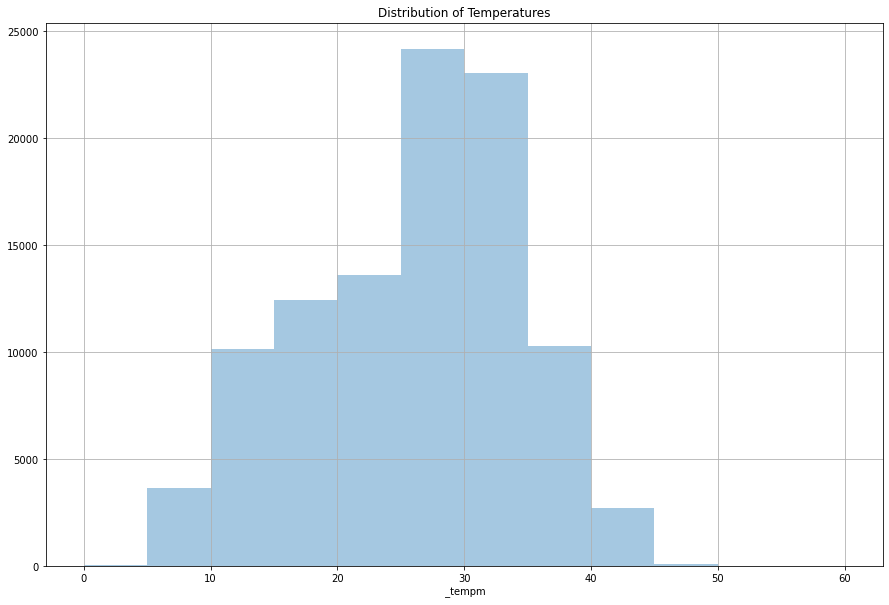

In [ ]:
plt.figure(figsize=(15, 10))
sns.distplot(df[' _tempm'],bins=[i for i in range(0,61,5)], kde=False)
plt.title("Distribution of Temperatures")
plt.grid()
plt.show()

In [ ]:
df['datetime_utc'] = pd.to_datetime(df['datetime_utc'])
df['datetime_utc']


0        1996-11-01 11:00:00
1        1996-11-01 12:00:00
2        1996-11-01 13:00:00
3        1996-11-01 14:00:00
4        1996-11-01 16:00:00
                 ...        
100985   2017-04-24 06:00:00
100986   2017-04-24 09:00:00
100987   2017-04-24 12:00:00
100988   2017-04-24 15:00:00
100989   2017-04-24 18:00:00
Name: datetime_utc, Length: 100990, dtype: datetime64[ns]

In [ ]:
df[' _tempm'].fillna(df[' _tempm'].mean(), inplace=True)

In [ ]:
df[' _tempm'].isna().sum()

0

In [ ]:
str(df['datetime_utc'][0])

'1996-11-01 11:00:00'

In [ ]:
def get_year(x):
  return x[0:4]

In [ ]:
def get_month(x):
  return x[5:7]

In [ ]:
df['year'] = df['datetime_utc'].apply(lambda x: get_year(str(x)))
df['month'] = df['datetime_utc'].apply(lambda x: get_month(str(x)))

In [ ]:
temp_year = pd.crosstab(df['year'], df['month'], values=df[' _tempm'], aggfunc='mean')

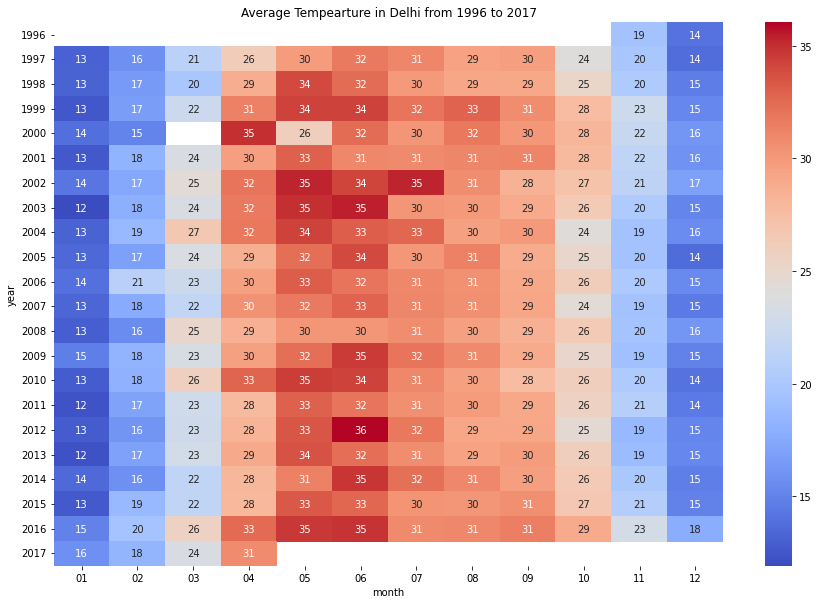

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(temp_year, cmap='coolwarm', annot=True)
plt.title("Average Tempearture in Delhi from 1996 to 2017")
plt.show()

In [ ]:
df[' _hum'].isna().sum()

757

In [ ]:
df[' _hum'].fillna(df[' _hum'].mean(), inplace=True)

In [ ]:
humidity_year = pd.crosstab(df['year'], df['month'], values=df[' _hum'], aggfunc='mean')

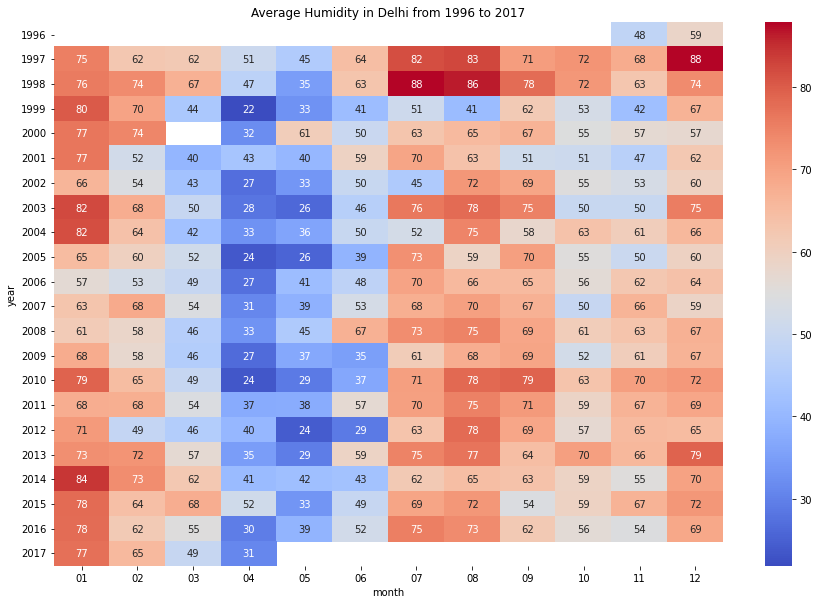

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(humidity_year, cmap='coolwarm', annot=True)
plt.title("Average Humidity in Delhi from 1996 to 2017")
plt.show()

In [ ]:
data = pd.DataFrame(list(df[' _tempm']), index=df['datetime_utc'], columns=['temp'])

In [ ]:
data = data.resample('D').mean()

In [ ]:
data.temp.isna().sum()


141

In [ ]:
data.fillna(data['temp'].mean(), inplace=True)


In [ ]:
data.temp.isna().sum()


0

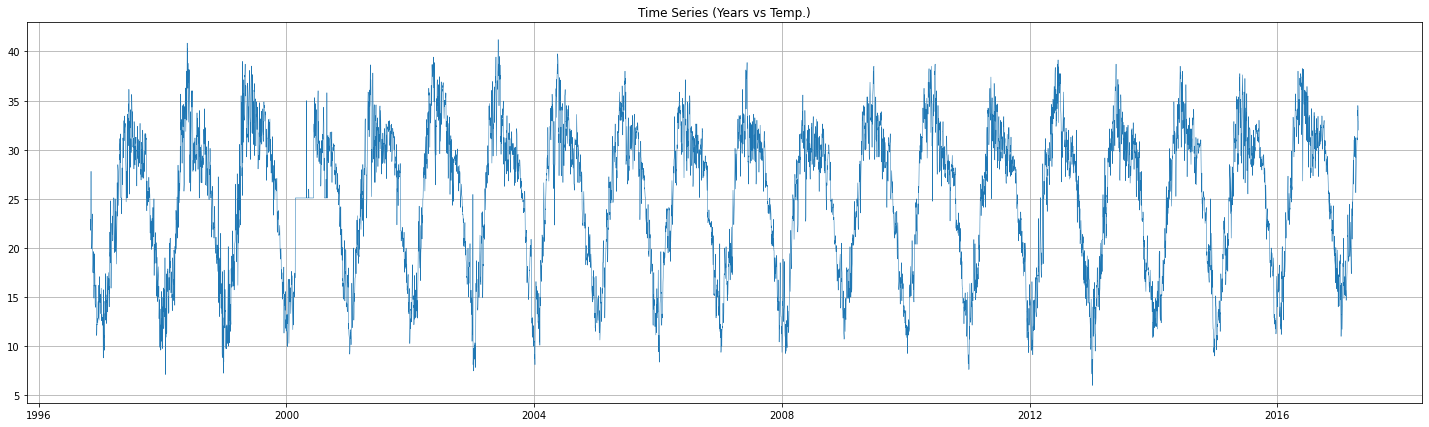

In [ ]:
plt.figure(figsize=(25, 7))
plt.plot(data, linewidth=.5)
plt.grid()
plt.title("Time Series (Years vs Temp.)")
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(-1,1))
data_scaled = scalar.fit_transform(data)


In [ ]:
data_scaled


array([[-0.07224714],
       [-0.0391131 ],
       [-0.10301445],
       ...,
       [ 0.52795217],
       [ 0.52653214],
       [ 0.47683109]])

In [ ]:
steps = 30
inp = []
out = []
for i in range(len(data_scaled)- (steps)):
    inp.append(data_scaled[i:i+steps])
    out.append(data_scaled[i+steps])


In [ ]:
inp=np.asanyarray(inp)
out=np.asanyarray(out)

In [ ]:
x_train = inp[:7300,:,:]
x_test = inp[7300:,:,:]    
y_train = out[:7300]    
y_test= out[7300:]

In [ ]:
from keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping
early_stop = EarlyStopping(monitor = "loss", mode = "min", patience = 7)
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(30,1)))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(30))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(Bidirectional(LSTM(128, activation='relu')))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

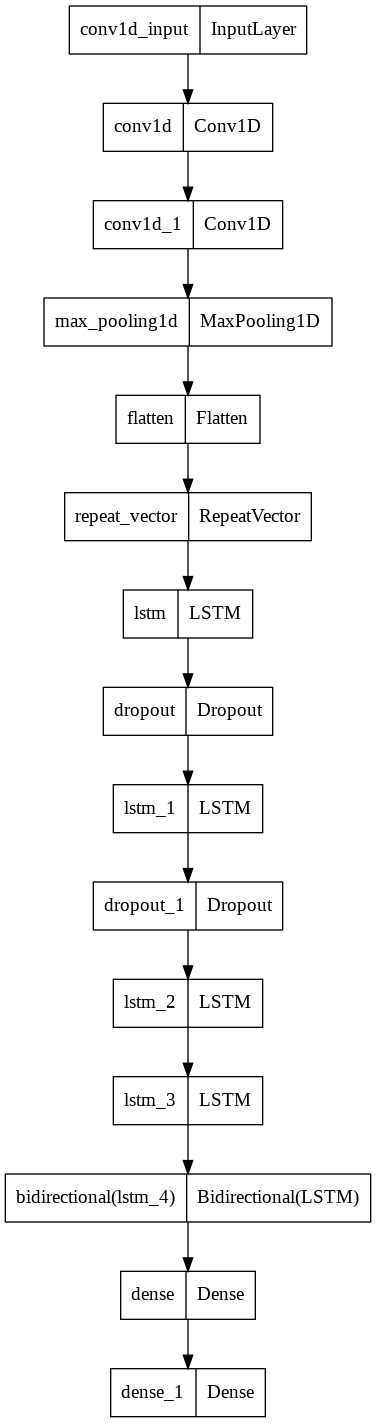

In [ ]:
plot_model(model, to_file='model.png')


In [ ]:
history = model.fit(x_train,y_train,epochs=20, verbose=1, callbacks = [early_stop] )

Epoch 1/20
229/229 [==============================] - 74s 322ms/step - loss: 0.0146
Epoch 2/20
229/229 [==============================] - 73s 317ms/step - loss: 0.0119
Epoch 3/20
229/229 [==============================] - 72s 312ms/step - loss: 0.0110
Epoch 4/20
229/229 [==============================] - 72s 315ms/step - loss: 0.0107
Epoch 5/20
229/229 [==============================] - 72s 315ms/step - loss: 0.0102
Epoch 6/20
229/229 [==============================] - 72s 314ms/step - loss: 0.0109
Epoch 7/20
229/229 [==============================] - 71s 311ms/step - loss: 0.0104
Epoch 8/20
229/229 [==============================] - 71s 311ms/step - loss: 0.0098
Epoch 9/20
229/229 [==============================] - 72s 315ms/step - loss: 0.0100
Epoch 10/20
229/229 [==============================] - 72s 316ms/step - loss: 0.0100
Epoch 11/20
229/229 [==============================] - 73s 321ms/step - loss: 0.0097
Epoch 12/20
229/229 [==============================] - 73s 318ms/step - lo

In [ ]:
predict = model.predict(x_test)


In [ ]:
predict = scalar.inverse_transform(predict)


In [ ]:
Ytesting = scalar.inverse_transform(y_test)


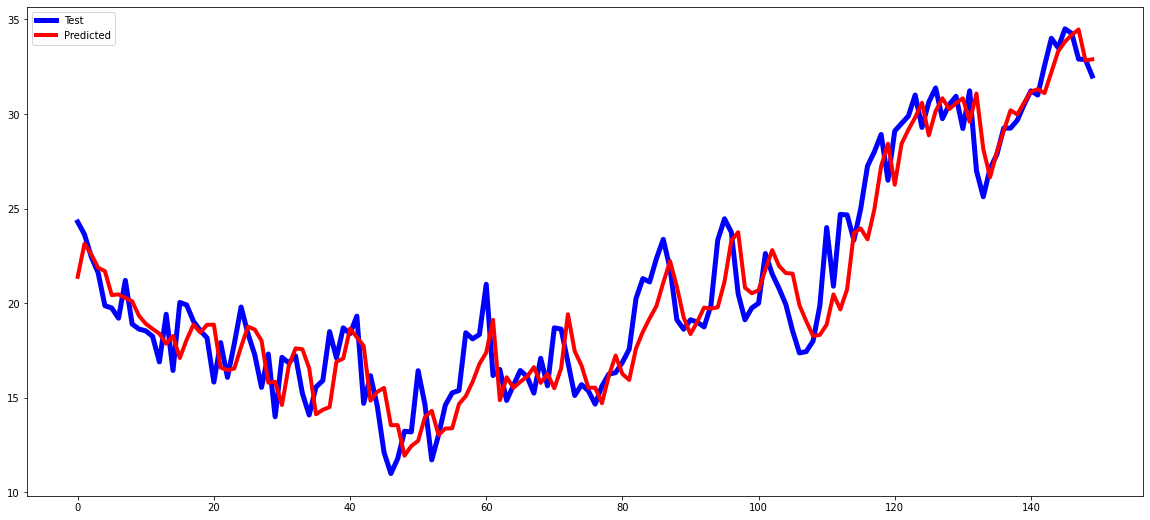

In [ ]:
plt.figure(figsize=(20,9))
plt.plot(Ytesting , 'blue', linewidth=5)
plt.plot(predict,'r' , linewidth=4)
plt.legend(('Test','Predicted'))
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Ytesting, predict)


3.412706007509064

In [ ]:
import math

In [ ]:
rmse = math.sqrt(3.412706007509064)
rmse

1.847351078574147